# import necessary modules

In [10]:
import pandas as pd
import numpy as  np
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc


In [11]:
trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')
trainset.info()
print('-'*90)
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [29]:
print(trainset.describe())
#typeland = trainset[['MSZoning','SalePrice']].groupby('MSZoning').mean()
#print(typeland)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

# Filling some NA values with mean

In [97]:
trainset['LotFrontage'].fillna(trainset['LotFrontage'].mean(),inplace=True)
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [109]:
testset['LotFrontage'].fillna(testset['LotFrontage'].mean(),inplace=True)
testset['MSSubClass'].fillna(testset['MSSubClass'].mode(),inplace=True)
testset['LotArea'].fillna(testset['LotArea'].mean(),inplace=True)
testset['OverallQual'].fillna(testset['OverallQual'].mode(),inplace=True)
testset['OverallCond'].fillna(testset['OverallCond'].mode(),inplace=True)
testset['YearBuilt'].fillna(testset['YearBuilt'].mode(),inplace=True)
testset['BsmtFinSF1'].fillna(testset['BsmtFinSF1'].mean(),inplace=True)
testset['BsmtFinSF2'].fillna(testset['BsmtFinSF2'].mean(),inplace=True)
testset['BsmtUnfSF'].fillna(testset['BsmtUnfSF'].mean(),inplace=True)
testset['TotalBsmtSF'].fillna(testset['TotalBsmtSF'].mean(),inplace=True)
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# Do some analysis using graph

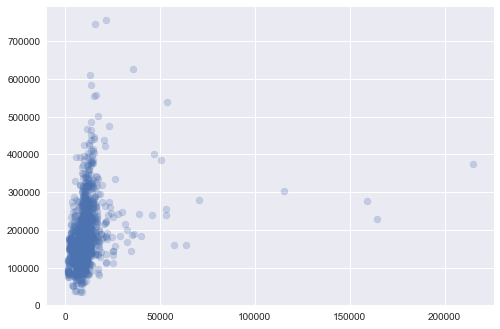

In [19]:
plt.scatter(trainset['LotArea'],trainset['SalePrice'],alpha=0.25)
plt.show()

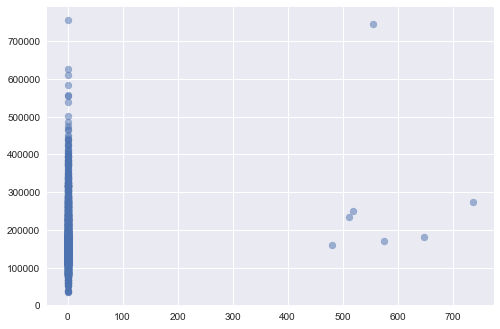

In [22]:
plt.scatter(trainset['PoolArea'],trainset['SalePrice'],alpha=0.5)
plt.show()

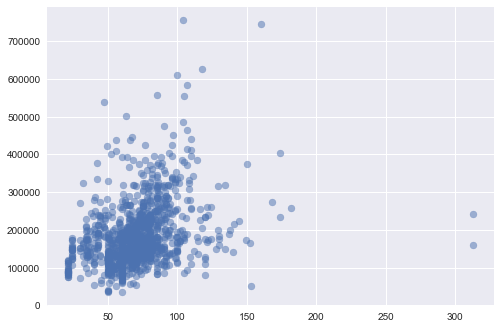

In [23]:
plt.scatter(trainset['LotFrontage'],trainset['SalePrice'],alpha=0.5)
plt.show()

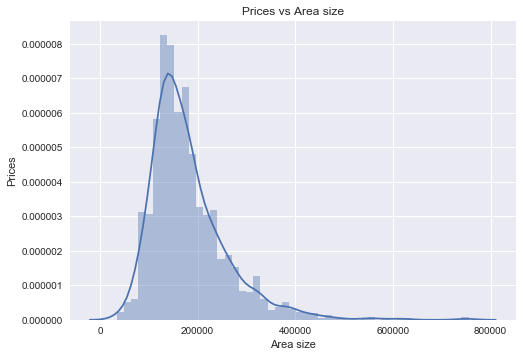

In [9]:
sns.distplot(train['SalePrice'])
#plt.plot(train.LotArea,train.SalePrice,r'o')
plt.xlabel('Area size')
plt.ylabel('Prices')
plt.title('Prices vs Area size')
plt.show()

# Create train features

In [110]:
x_train = trainset[['LotFrontage','LotArea','PoolArea','OverallQual','OverallCond','YearBuilt','MSSubClass','1stFlrSF','2ndFlrSF'
                   ,'YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
y_train = trainset['SalePrice']
x_test = testset[['LotFrontage','LotArea','PoolArea','OverallQual','OverallCond','YearBuilt','MSSubClass','1stFlrSF','2ndFlrSF'
                   ,'YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

# Train classifier

In [111]:
clf = rfc(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Now Predict with x_test

In [112]:
y_test = clf.predict(x_test)

In [113]:
print(clf.score(x_train,y_train)*100)

98.904109589


In [114]:
submission = pd.DataFrame({'Id':testset['Id'],'SalePrice':y_test})

In [115]:
submission.to_csv('submission.csv',index = False)